# Press `Change runtime type` button on  `Runtime` to set to CPU or TPU

# Run the codes following to build gen run environment


In [ ]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.2-linux-x86_64.tar.gz" -o julia.tar.gz

!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*

!julia -e 'import Pkg; Pkg.add("IJulia")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("IJulia")' > /dev/null 2>&1

!julia -e 'import Pkg; Pkg.add("PyPlot")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("CSV")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("DataFrames")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("Distributions")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("Gen")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("JLD2")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("Luxor")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("Plots")' > /dev/null 2>&1
!julia -e 'import Pkg; Pkg.add("StatsBase")' > /dev/null 2>&1

!julia -e 'using Pkg; Pkg.add("PyPlot")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("CSV")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("DataFrames")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("Distributions")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("Gen")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("JLD2")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("Luxor")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("Plots")' > /dev/null 2>&1
!julia -e 'using Pkg; Pkg.add("StatsBase")' > /dev/null 2>&1

# !JULIA_PROJECT=. julia -e 'import Pkg; Pkg.instantiate()' > /dev/null 2>&1
# !JULIA_PROJECT=. julia -e 'import Pkg; Pkg.build()' > /dev/null 2>&1

# Currently, `Change runtime type` defaults to `julia`, but change it once to `python3` and again to `julia`


In [6]:
versioninfo()

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, broadwell)


# Example: Bayesian linear regression

In [7]:
using Gen

[ Info: Precompiling Gen [ea4f424c-a589-11e8-07c0-fd5c91b9da4a]


In [8]:
using Plots

In [9]:
@gen function line_model(xs::Vector{Float64})
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = ({:slope} ~ normal(0, 1))
    intercept = ({:intercept} ~ normal(0, 2))

    # We define a function to compute y for a given x
    function y(x)
        return slope * x + intercept
    end

    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        # Note that we name each random choice in this loop
        # slightly differently: the first time through,
        # the name (:y, 1) will be used, then (:y, 2) for
        # the second point, and so on.
        ({(:y, i)} ~ normal(y(x), 0.1))
    end

    # Most of the time, we don't care about the return
    # value of a model, only the random choices it makes.
    # It can sometimems be useful to return something
    # meaningful, however; here, we return the function `y`.
    return y
end;

In [10]:
xs = [-5., -4., -3., -2., -1., 0., 1., 2., 3., 4., 5.];

In [11]:
y = line_model(xs)

y (generic function with 1 method)

In [12]:
trace = Gen.simulate(line_model, (xs,));

In [13]:
println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Vector{Float64}], false, Union{Nothing, Some{Any}}[nothing], var"##line_model#291", Bool[0], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((:y, 11) => Gen.ChoiceOrCallRecord{Float64}(5.974877656375782, 1.0188982876057444, NaN, true), (:y, 3) => Gen.ChoiceOrCallRecord{Float64}(-2.820300403150457, 0.47120477064182653, NaN, true), :intercept => Gen.ChoiceOrCallRecord{Float64}(0.594350490263908, -1.6562422769242364, NaN, true), (:y, 1) => Gen.ChoiceOrCallRecord{Float64}(-4.783824841154241, 0.9985345771438399, NaN, true), (:y, 8) => Gen.ChoiceOrCallRecord{Float64}(2.7340967157263543, 1.2749339889235525, NaN, true), (:y, 7) => Gen.ChoiceOrCallRecord{Float64}(1.6545652944368598, 1.3292864706720633, NaN, true), (:y, 5) => Gen.ChoiceOrCallRecord{Float64}(-0.4775500255852825, 1.3609896746151717, NaN, true), (:y, 6) => Gen.ChoiceOrCallRecord{Float64}(0.

In [14]:
Gen.get_choices(trace)

│
├── (:y, 11) : 5.974877656375782
│
├── (:y, 3) : -2.820300403150457
│
├── :intercept : 0.594350490263908
│
├── (:y, 1) : -4.783824841154241
│
├── (:y, 8) : 2.7340967157263543
│
├── (:y, 7) : 1.6545652944368598
│
├── (:y, 5) : -0.4775500255852825
│
├── (:y, 6) : 0.5471238229191012
│
├── (:y, 10) : 5.06148543725712
│
├── :slope : 1.093187547194214
│
├── (:y, 4) : -1.5203542927839704
│
├── (:y, 2) : -3.7616711256049964
│
└── (:y, 9) : 3.63325479231744


In [15]:
choices = Gen.get_choices(trace)
choices[:slope]

1.093187547194214

In [16]:
trace[:slope]

1.093187547194214

In [17]:
Gen.get_retval(trace)

y (generic function with 1 method)

In [18]:
trace[]

y (generic function with 1 method)

In [19]:
function render_trace(trace; show_data=true)

    # Pull out xs from the trace
    xs, = get_args(trace)

    xmin = minimum(xs)
    xmax = maximum(xs)

    # Pull out the return value, useful for plotting
    y = get_retval(trace)

    # Draw the line
    test_xs = collect(range(-5, stop=5, length=1000))
    fig = plot(test_xs, map(y, test_xs), color="black", alpha=0.5, label=nothing,
                xlim=(xmin, xmax), ylim=(xmin, xmax))

    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]

        # Plot the data set
        scatter!(xs, ys, c="black", label=nothing)
    end

    return fig
end;

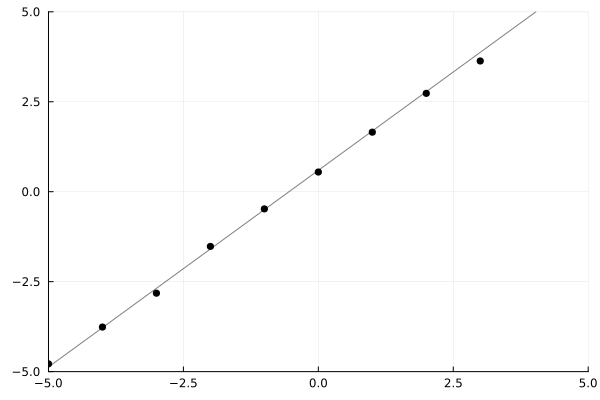

In [20]:
render_trace(trace)

In [27]:
function RecipesBase.grid(renderer::Function, traces)
    Plots.plot(map(renderer, traces)...)
end;

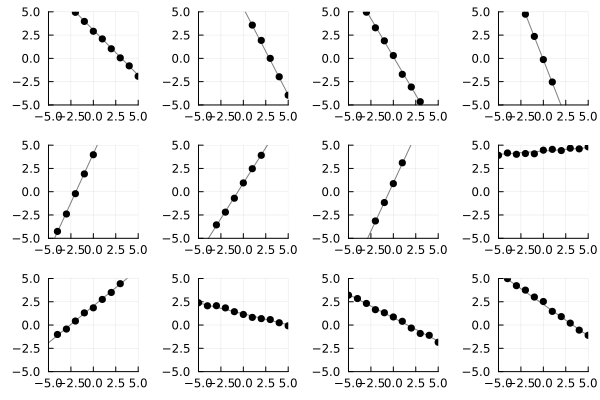

In [28]:
traces = [Gen.simulate(line_model, (xs,)) for _=1:12]
grid(render_trace, traces)